# PRCP-1018-BikeRental

# Problem Statement

## Task 1:- Prepare a complete data analysis report on the given data.
## Task 2:- Prediction of daily bike rental count based on the environmental and seasonal settings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Atribute information
Both the files hour.csv and day.csv have the following fields, except hr which is not
available in day.csv
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:
- - yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if neither weekend nor holiday, it is 1; otherwise 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
- 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-
t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-
t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registeredfall)

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df.shape

(731, 16)

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Renaming the column names for better understanding

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df = df.rename(columns = {'dteday':'Date',
                         'yr':'year',
                         'mnth':'month',
                         'weathersit':'weather',
                         'hum':'humidity',
                         'cnt':'count'})


In [9]:
hour_df = hour_df.rename(columns = {'dteday':'Date',
                         'yr':'year',
                          'hr':'hour',
                         'mnth':'month',
                         'weathersit':'weather',
                         'hum':'humidity',
                         'cnt':'count'})


### Typecasting the features
1. Converting date into datetime object
2. Season, year, month, holiday, weekday, workingday, weather are categorical values, these all values are in interger, we need to connvert from integer value to categorical, then we can use encoding techniques for these categorical values.

In [10]:
#Change date from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# change int columns to category
cols = ['season','year','month','holiday','weekday','workingday','weather']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   Date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weather     731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: category(7), datetime64

In [12]:
df.describe()

,instant,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### insights
1. Instant is just a number, we need to remove this feature
2. year it's 0 and 1
3. seems like casual + registered = count
4. Highest no of bikes has been rented is 8714 in a day, while least is 22, on an average it is 4500

# Task 1:- Prepare a complete data analysis report on the given data

# Exploratory Data Analysis by hourly wise

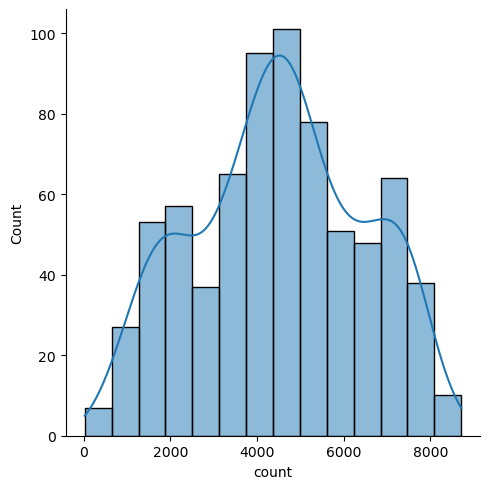

In [13]:
sns.displot(data = df, x = 'count', kde = True)

### Rentals by season

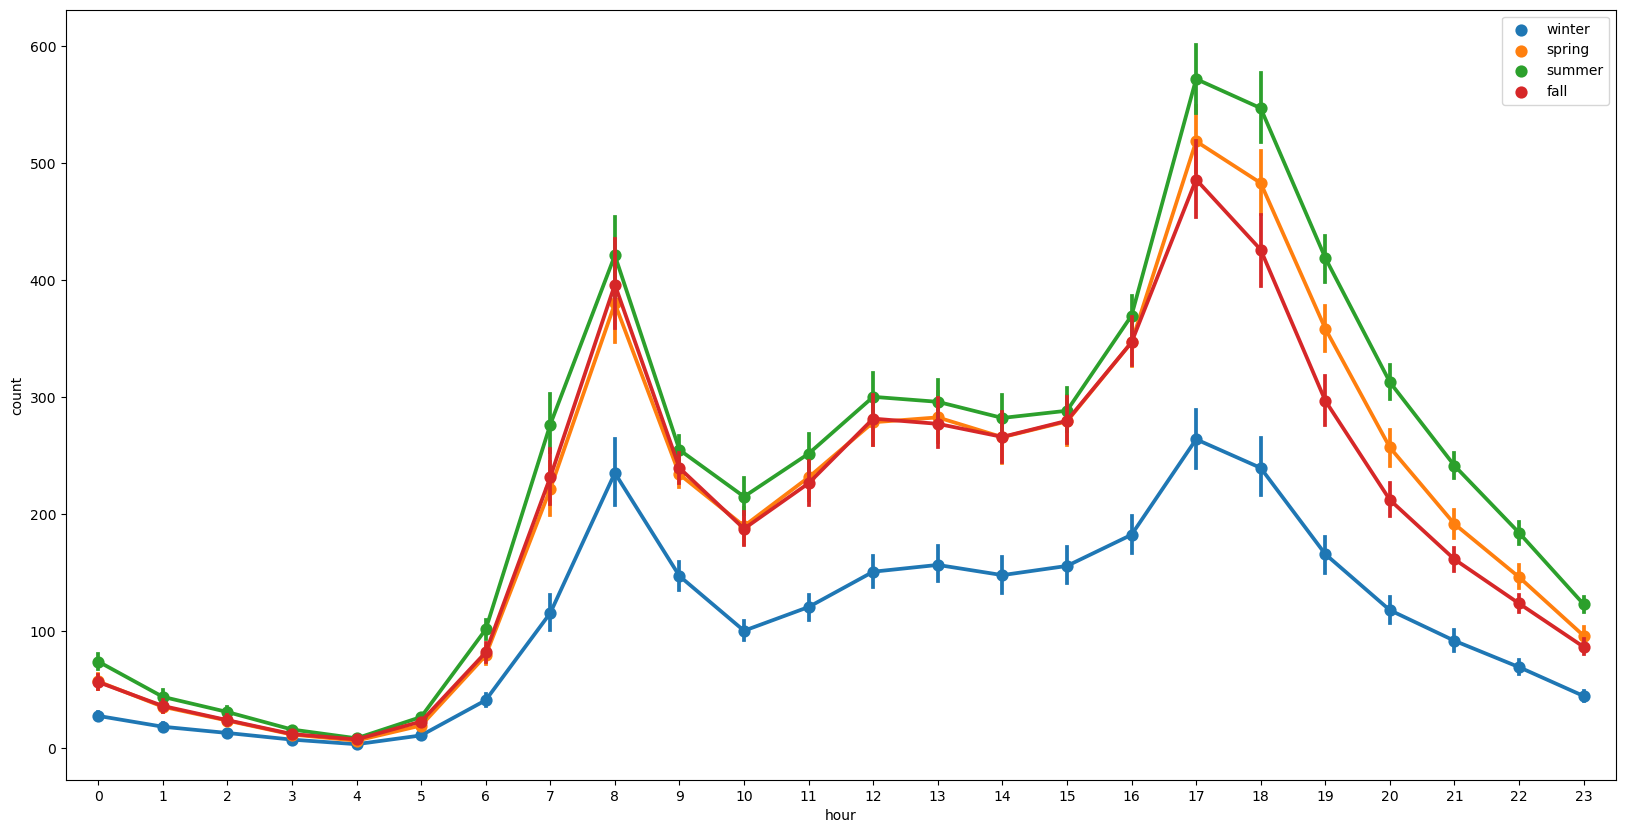

In [14]:
plt.figure(figsize=(20,10))
sns.pointplot(x = 'hour', y = 'count', data = hour_df, hue = 'season')
season_labels = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
# Create the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [season_labels[int(label)] for label in labels])

# Show the plot
plt.show()

##### insights
1. Bike rentels are exponential from 6 to 8 and 16 to 18, and less bike rentals during office hours, and again, exponential from evening 4 to  6
2. Bike rentals are very less in winter season, and nearly equal in remaing 3 seasons
3. summer has  highest bike rentals while winter is lowest

###  Rentals by weather

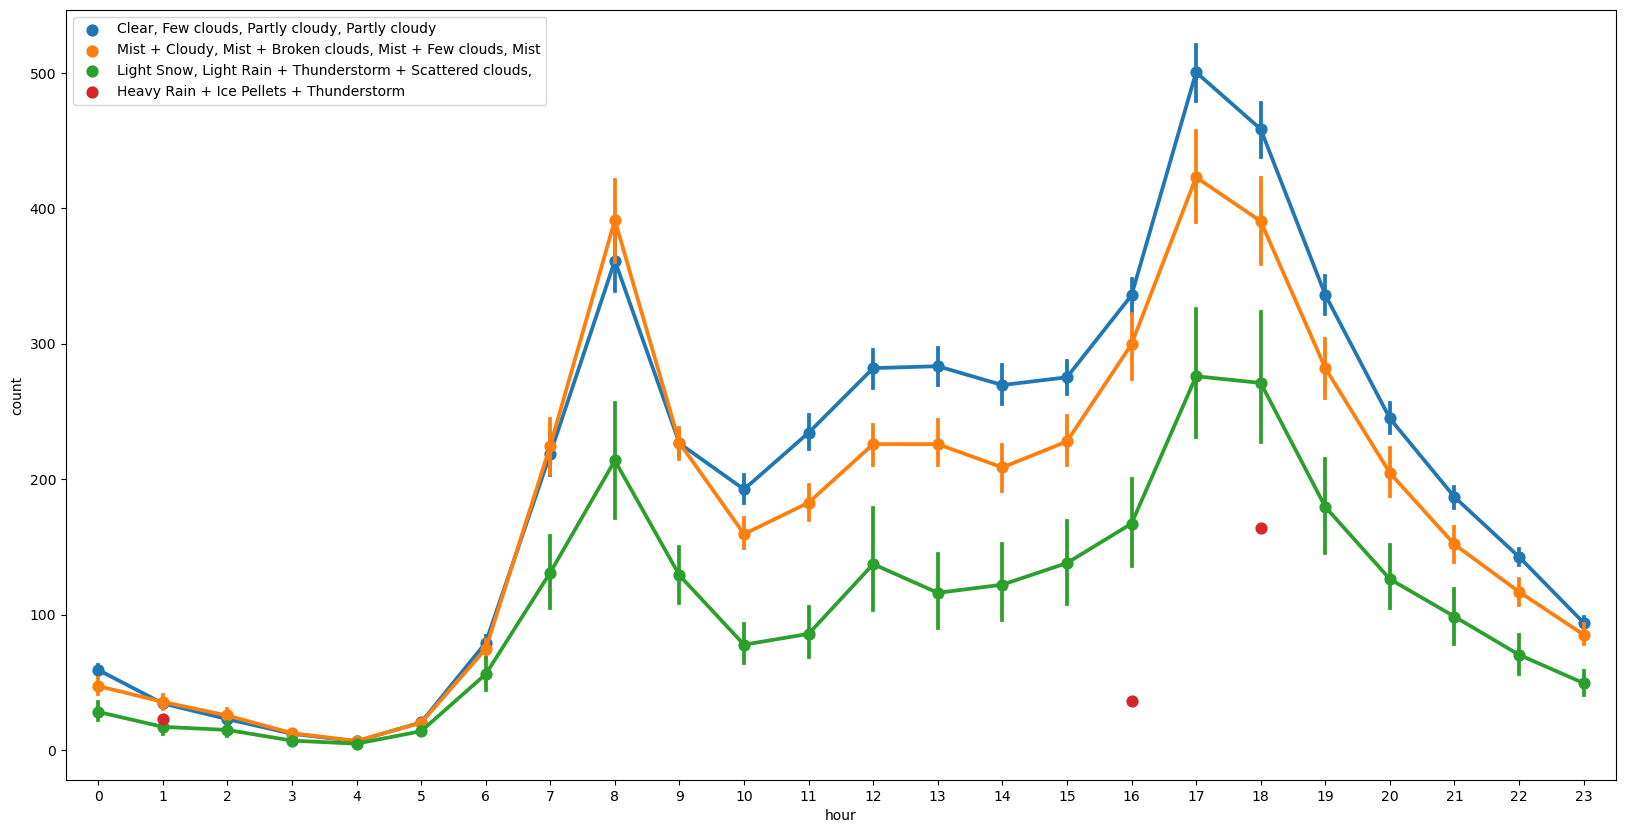

In [15]:

plt.figure(figsize=(20,10))
sns.pointplot(x = 'hour', y = 'count', data = hour_df, hue = 'weather')
season_labels = {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds,', 4: 'Heavy Rain + Ice Pellets + Thunderstorm'}
# Create the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [season_labels[int(label)] for label in labels])

# Show the plot
plt.show()

##### Insights

1. Seems like no wants want to rent bike during heavy rains, only a few hired at 16 and 18th hour.
2. It's also same like season wise, majority of rental hours happening during office going and ending hours

### Rentals by holiday

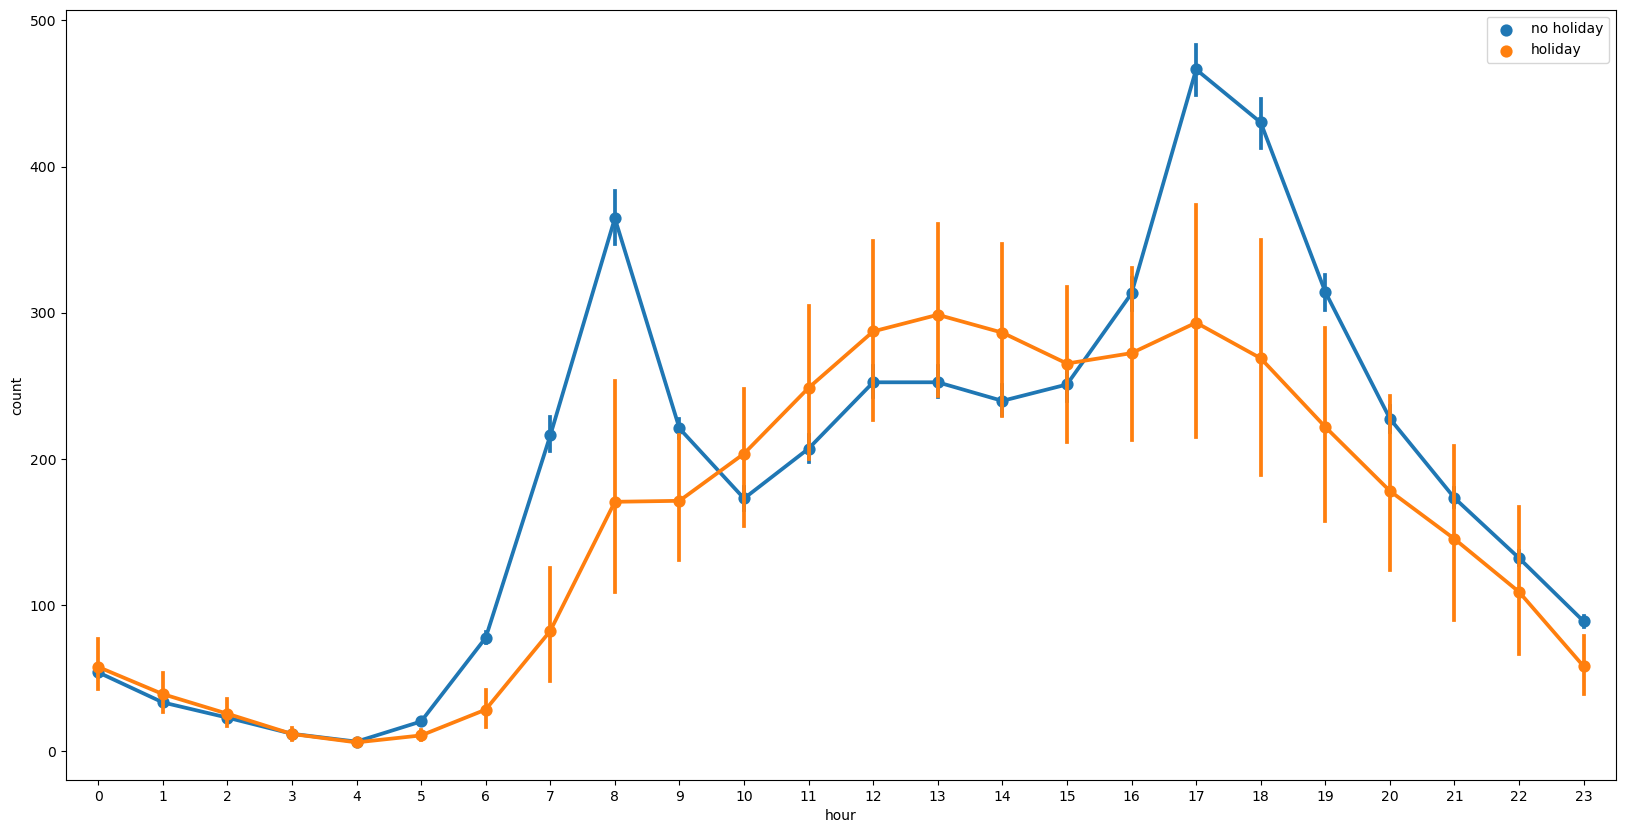

In [16]:
plt.figure(figsize=(20,10))
sns.pointplot(x = 'hour', y = 'count', data = hour_df, hue = 'holiday')
holiday_labels = {1:'holiday', 0:'no holiday'}

# Create the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [holiday_labels[int(label)] for label in labels])

# Show the plot
plt.show()

##### insights
1. During holiday times majority of rentals happening at noon hours

In [17]:
hour_df.columns

Index(['instant', 'Date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Rentals by weekday

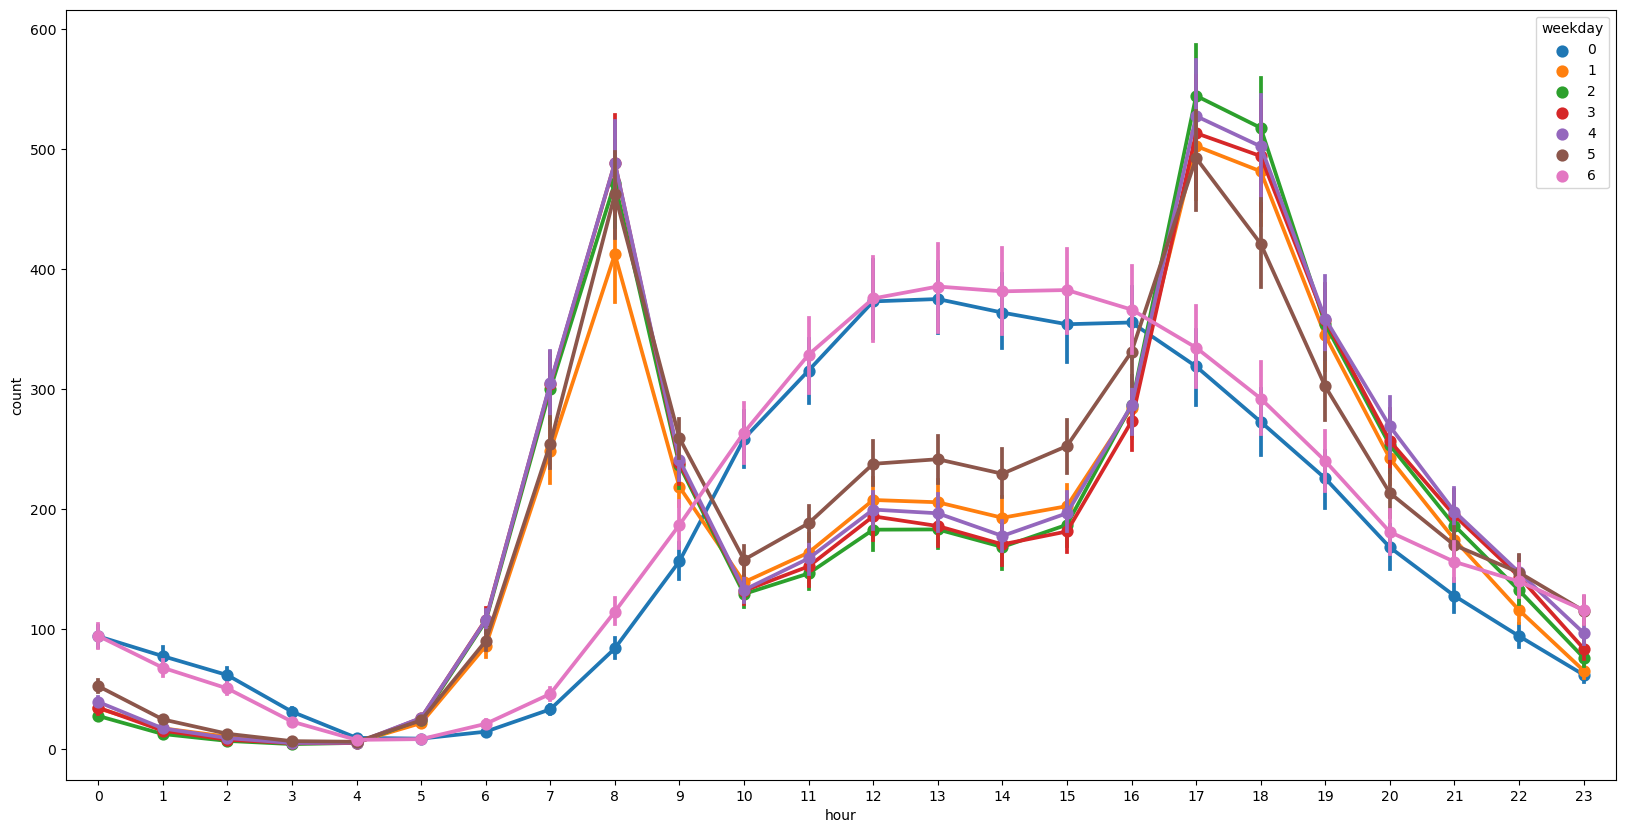

In [18]:
plt.figure(figsize=(20,10))
sns.pointplot(x = 'hour', y = 'count', data = hour_df, hue = 'weekday');

##### insights
1. In weekend [0,6] majority of rentals happening during day hours
   

# EDA with Daywise data

In [19]:
df.head()

,instant,Date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Rentals by monthlywise

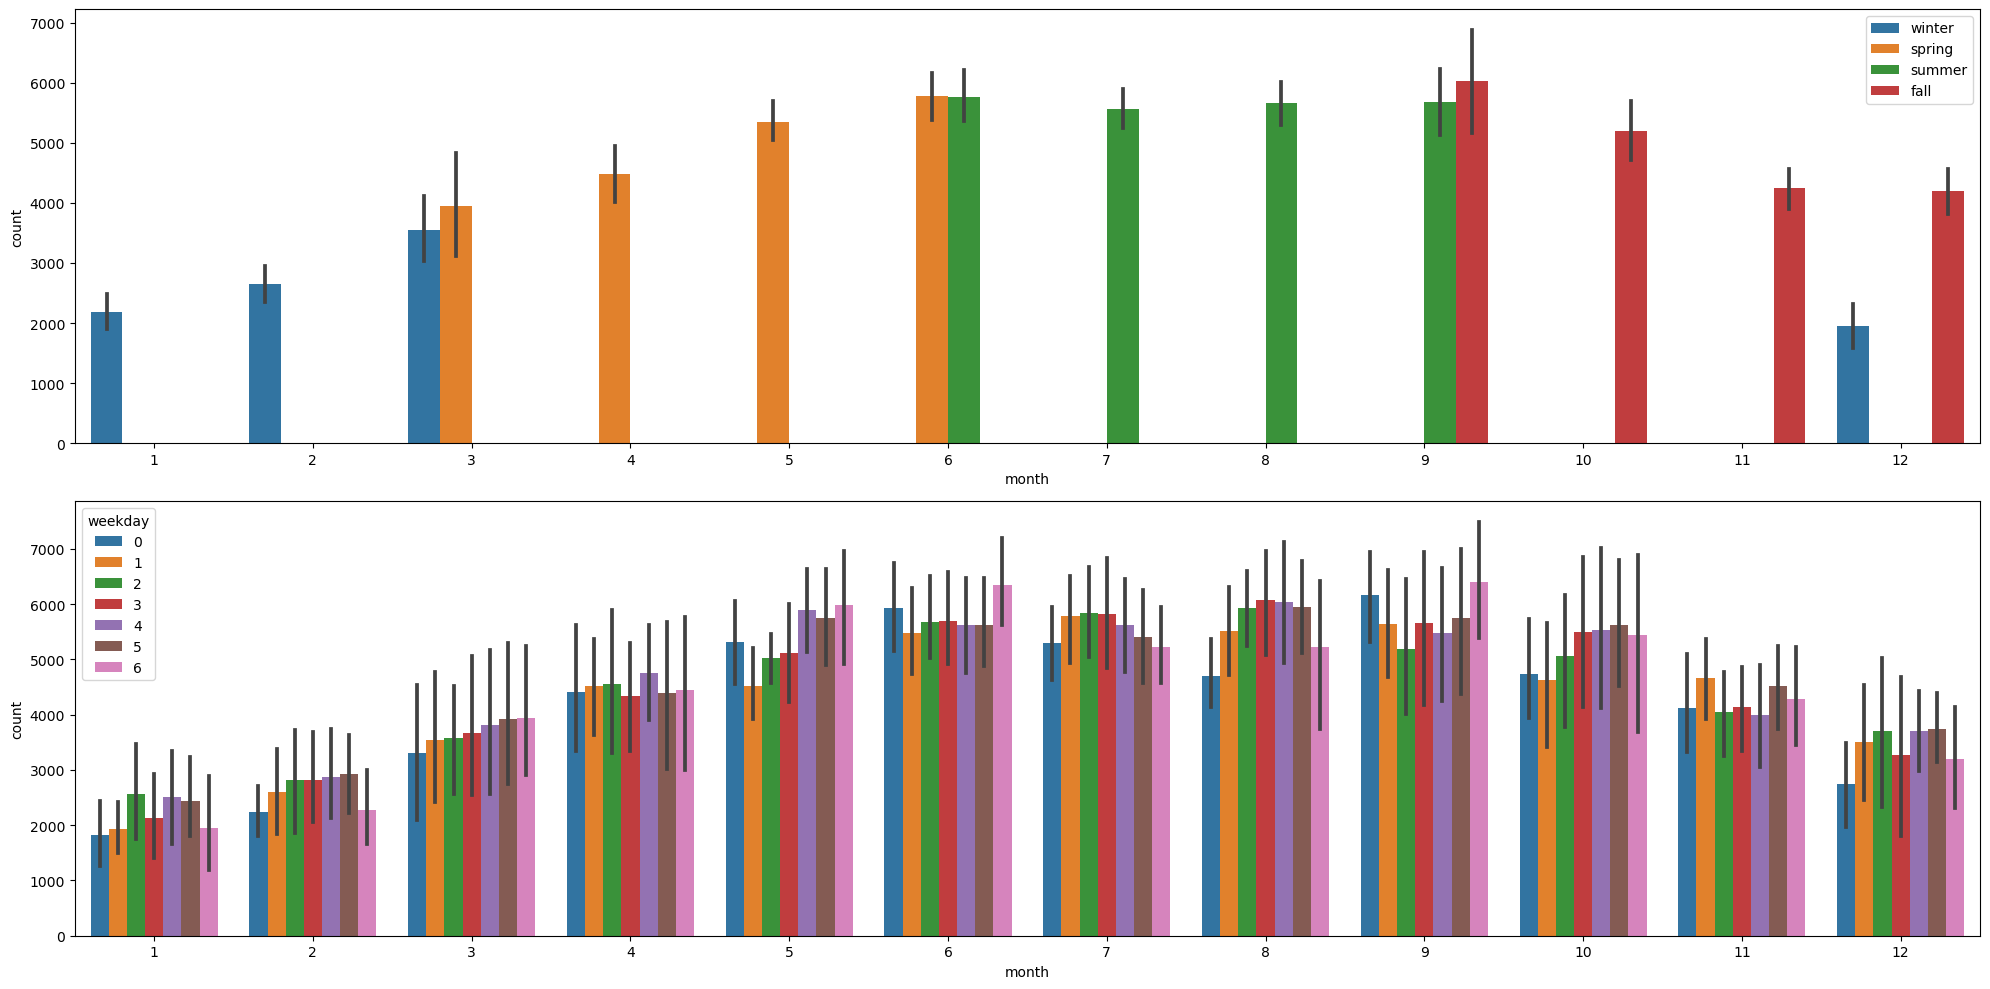

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))

sns.barplot(x='month', y='count', data=df, ax=ax[0], hue = 'season')
season_labels = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}

# Create the legend
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, [season_labels[int(label)] for label in labels])

# Second subplot
sns.barplot(x='month', y='count', data=df, ax=ax[1], hue = 'weekday' )

plt.tight_layout()  # Adjusts subplots to prevent overlap

plt.show()

### Insights
1. Rentals are high at middle of the year, and rentals are high, and constant during summer
2. At starting months rents are less, because of summer

## Rentals by holiday

<Axes: xlabel='holiday', ylabel='count'>

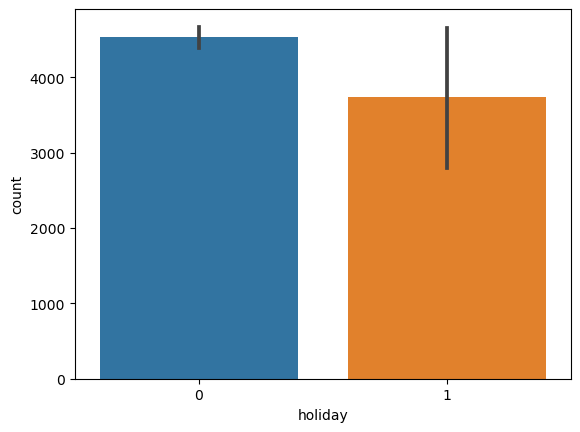

In [21]:
sns.barplot(x = 'holiday', y = 'count', data = df)

### Insights
1. Rentals are less during holiday

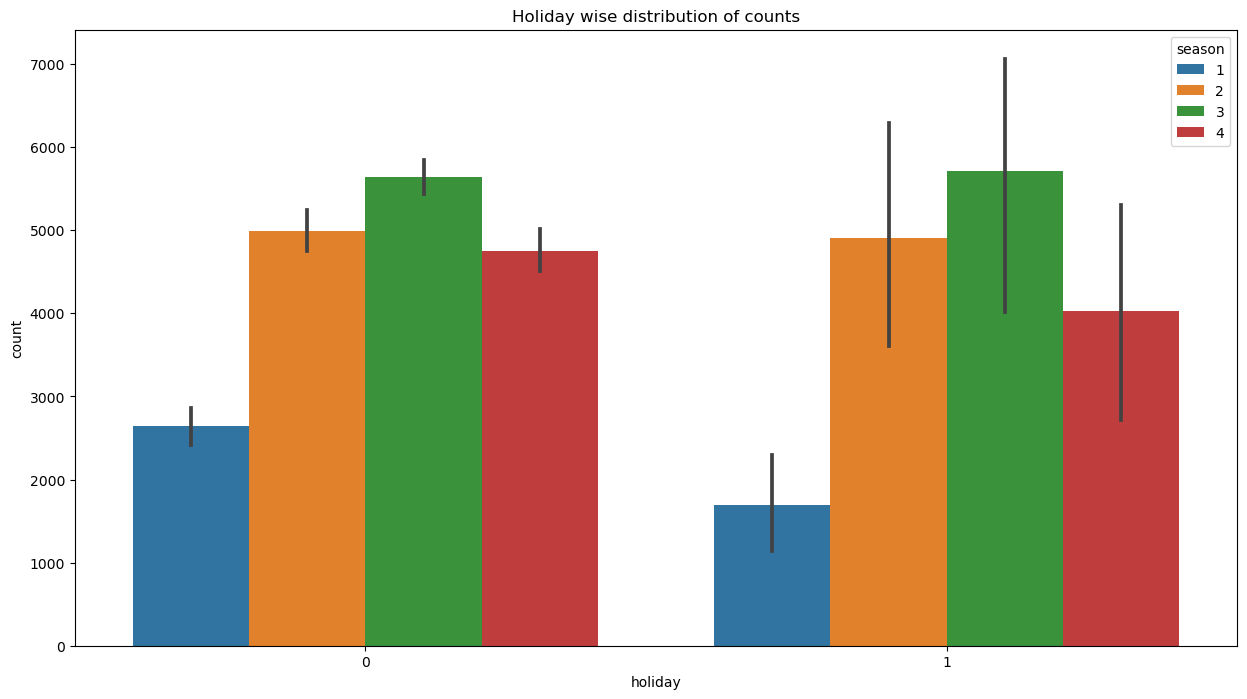

In [22]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=df,x='holiday',y='count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

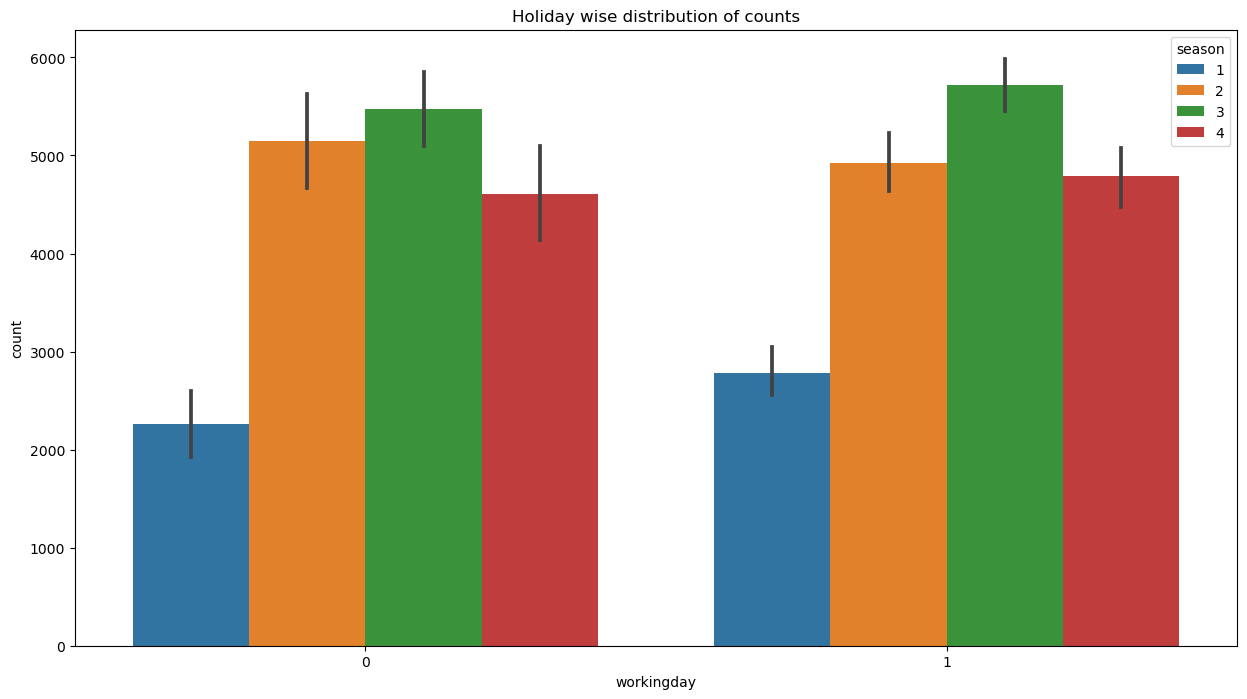

In [23]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=df,x='workingday',y='count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

## Rentals yearly wise

Text(0, 0.5, 'Count')

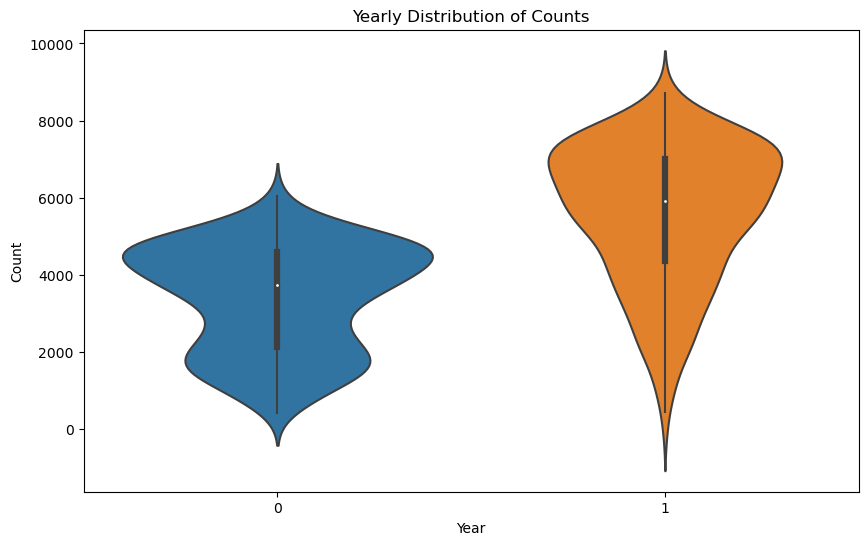

In [24]:
plt.figure(figsize=(10,6))
sns.violinplot(x = 'year', y = 'count', data = df)
plt.title('Yearly Distribution of Counts')  # Setting the title directly with plt.title()
plt.xlabel('Year')
plt.ylabel('Count')

Bike rental distribution is higher in 2002 than 2001

### insights
1. Bike rents are high during 2nd year

In [25]:
df.columns

Index(['instant', 'Date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

# Checking for outliers in a data

## 1.Outliers in count

<Axes: xlabel='count'>

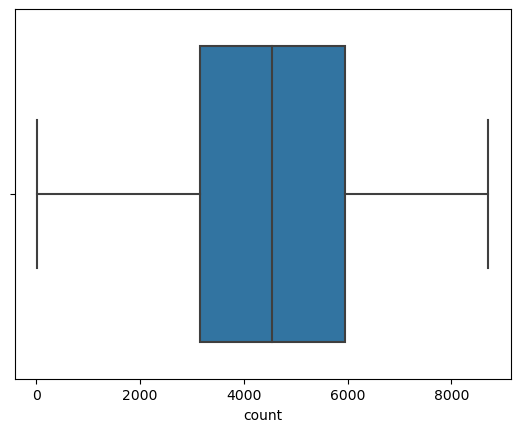

In [26]:
sns.boxplot(x = df['count'])

seems like there are no outliers in count

In [27]:
df.columns

Index(['instant', 'Date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

## outliers in remaining continious features 

### Temp, wind, humidity outliers

<Axes: >

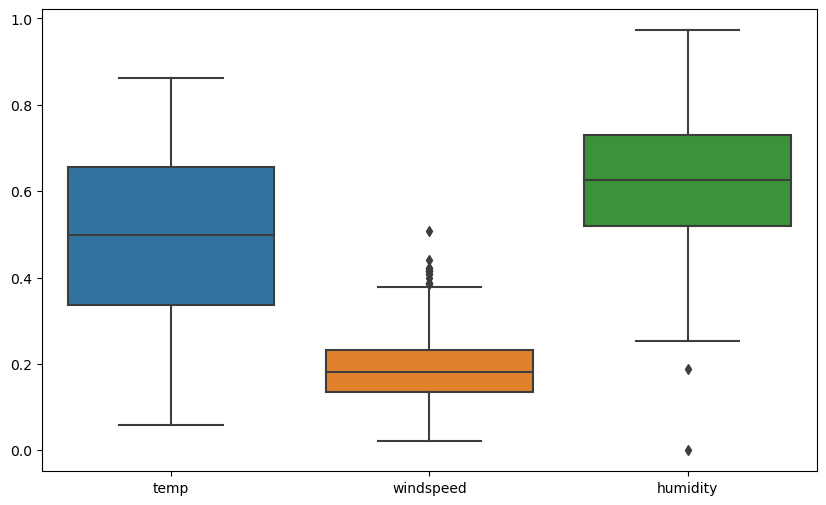

In [28]:
plt.figure(figsize = (10,6))
sns.boxplot(data= df[['temp', 'windspeed', 'humidity']])

From the boxplot,there are no outliers in temp, but outliers are found in humidity, and windspeed

In [29]:
median_humidity = df['windspeed'].median()


In [30]:


# Calculate the first and third quartiles
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value
median_windspeed = df['windspeed'].median()
df['windspeed'] = np.where(
    (df['windspeed'] > upper_bound) | (df['windspeed'] < lower_bound),
    median_windspeed,
    df['windspeed']
)


In [31]:
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame and 'humidity' is the feature column
# Replace outliers with the median value of 'humidity'

# Calculate the first and third quartiles for humidity
Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)

# Calculate the IQR (Interquartile Range) for humidity
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers for humidity
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers in 'humidity' with the median value
median_humidity = df['humidity'].median()
df['humidity'] = np.where(
    (df['humidity'] > upper_bound) | (df['humidity'] < lower_bound),
    median_humidity,
    df['humidity']
)


### Correlation b/w features

C:\Users\adhi5\AppData\Local\Temp\ipykernel_55000\1646817850.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

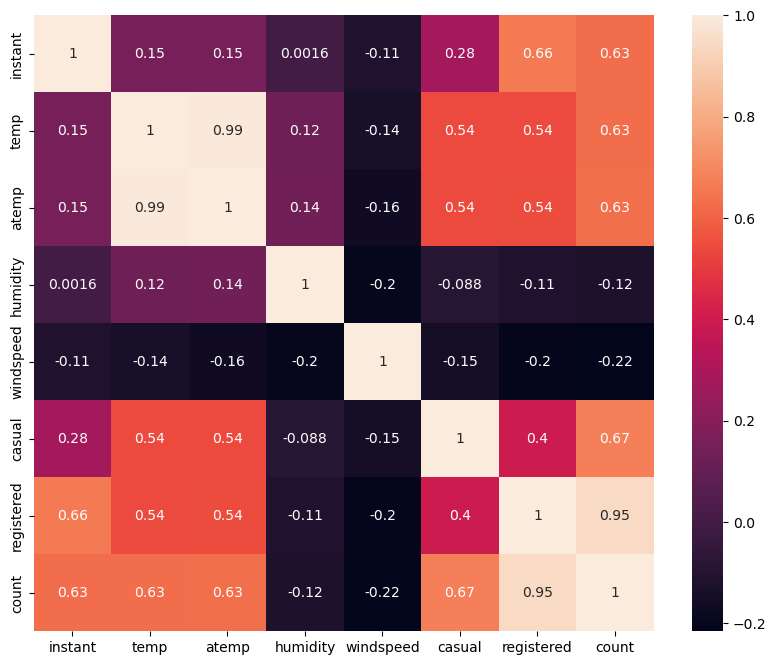

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)

temp&atemp, regestered&count are highly correlated, and theyr'e carrying same information, we'll remove useless features during feature selection.

# Task 2:- Prediction of daily bike rental count based on the environmental and seasonal settings.1. We are taking only necessary components based on envinronmental and seasonal settings


## One hot encoding

In [33]:
df_oh = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','year','month','holiday','weekday','workingday','weather']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()

,instant,Date,temp,atemp,humidity,windspeed,casual,registered,count,season_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,1,2011-01-01,0.344167,0.363625,0.805833,0.160446,331,654,985,0,...,0,0,0,0,0,0,1,0,1,0
1,2,2011-01-02,0.363478,0.353739,0.696087,0.248539,131,670,801,0,...,0,0,0,0,0,0,0,0,1,0
2,3,2011-01-03,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,...,0,1,0,0,0,0,0,1,0,0
3,4,2011-01-04,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,...,0,0,1,0,0,0,0,1,0,0
4,5,2011-01-05,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,...,0,0,0,1,0,0,0,1,0,0


### Droping constant and useless features

In [34]:
X = df_oh.drop(columns=['instant','Date','atemp', 'casual', 'registered', 'count'], axis=1)
y = df_oh['count']

In [55]:
X.columns

Index(['temp', 'humidity', 'windspeed', 'season_2', 'season_3', 'season_4',
       'year_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'workingday_1', 'weather_2', 'weather_3'],
      dtype='object')

# Model Evaluation

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Importing necessary algorithms

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error

#### Function to fit and predict the model

In [38]:
def fitAndPredict(model):
    """The following code makes faster to evaluate a model 
    automating the fit and accuracy process"""
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train R2 :", model.score(X_train, y_train))
    print('Test R2:', r2_score(y_test, prediction))
    print("Cross Validation Score: ", scores.mean())
    print('MAE:', mean_absolute_error(y_test, prediction))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
    return 'model ran successfully!'


In [39]:
lr = LinearRegression()
fitAndPredict(lr)

Train R2 : 0.8431892766153559
Test R2: 0.8376116200948707
Cross Validation Score:  0.8132504163579937
MAE: 592.995928807559
RMSE: 806.9437951018275


'model ran successfully!'

In [40]:
ridge = Ridge()
fitAndPredict(ridge)

Train R2 : 0.841254231564071
Test R2: 0.837506570092243
Cross Validation Score:  0.8129296908349921
MAE: 589.7812731690206
RMSE: 807.2047612584383


'model ran successfully!'

In [41]:
decission = DecisionTreeRegressor()
fitAndPredict(decission)

Train R2 : 1.0
Test R2: 0.7366936041820299
Cross Validation Score:  0.7221316793750542
MAE: 678.4557823129252
RMSE: 1027.5347454277273


'model ran successfully!'

In [42]:
r_forest = RandomForestRegressor()
fitAndPredict(r_forest)

Train R2 : 0.9808730939661092
Test R2: 0.8717874920038978
Cross Validation Score:  0.8374213390190096
MAE: 483.6106802721089
RMSE: 717.0195708545446


'model ran successfully!'

In [43]:
xg_boost = XGBRegressor()
fitAndPredict(xg_boost)

Train R2 : 0.9998782247328462
Test R2: 0.8604360989107547
Cross Validation Score:  0.8287124405776154
MAE: 515.1759095483897
RMSE: 748.0874381403411


'model ran successfully!'

## Tuning hyperparameters for random forest

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}


In [46]:
rf = RandomForestRegressor()

In [47]:
param_grid = {
    'n_estimators': [50, 100,120, 150],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


In [48]:
grid_search.best_score_

0.8398557221148177

In [49]:
grid_preds = grid_search.predict(X_test)

In [52]:
mae = mean_absolute_error(y_test,grid_preds )
mae

469.2670201577208

In [51]:
rmse = np.sqrt(mean_squared_error(y_test, grid_preds))
rmse

716.8895625915346